A Random Forest is actually just a bunch of Decision Trees bundled together

**Agenda**
- About Dataset
- Loading Libraries
- Loading Data
- Understanding Data
- Separating Input Features and Ouput/Target Features
- Splitting Data into Train and Test Sets.
- Build Model
- Prediction
- Check Model Performance

red wine data. Given different physiochemical tests, we want to predict the quality of wine in range 1 to 10.

notice the differences between Logistic Regression and Random Forest models.

In [1]:
import numpy as np # Fundamental package for linear algebra and multidimensional arrays
import pandas as pd # Data analysis and manipultion tool

# In read_csv() function, we have passed the location to where the files are located in the UCI website. The data is separated by ';'
# so we used separator as ';' (sep = ";")
red_wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")

In [2]:
# Red Wine
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
red_wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

#### Different attributes

Input variables (based on physicochemical tests):

- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol

Output variable (based on sensory data):

- quality (score between 0 and 10)

In [4]:
# Basic statistical details about data
red_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot: >

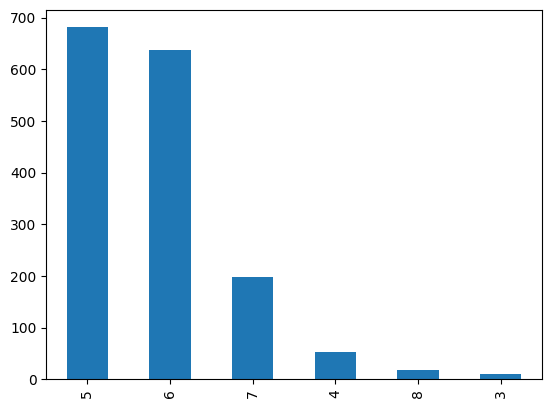

In [7]:
# plot the quality of the wine and sort the values
red_wine_data.quality.value_counts().plot(kind = 'bar')

<AxesSubplot: xlabel='quality', ylabel='count'>

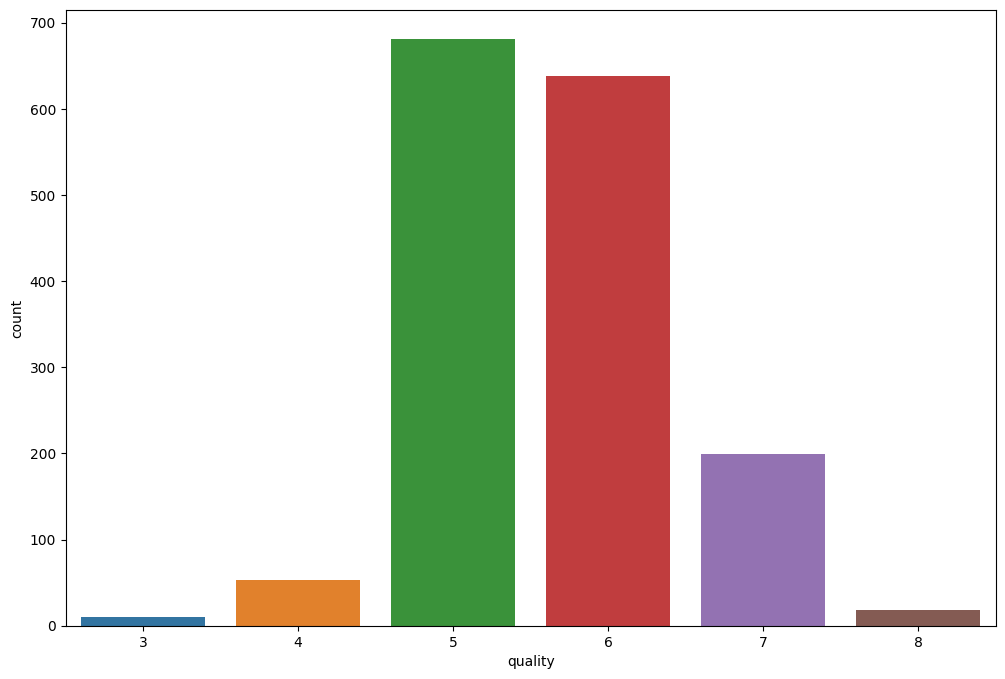

In [8]:
import seaborn as sns # Statistical data visualization
import matplotlib.pyplot as plt # Plotting library for Python programming language and its numerical mathematics extension NumPy

plt.figure(figsize=(12,8))
sns.countplot(x = red_wine_data.quality)

### Separating Input Features and Output Features

In [9]:
# Input/independent variables
X = red_wine_data.drop('quality', axis = 1) # her we are droping the quality feature as this is the target and 'X' is input features, the changes are not
# made inplace as we have not used 'inplace = True'

y = red_wine_data.quality # Output/Dependent variable

### Splitting the data into Train and Test Set

In [10]:
# import train_test_split
from sklearn.model_selection import train_test_split

# split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 42)

# X_train: independent/input feature data for training the model
# y_train: dependent/output feature data for training the model
# X_test: independent/input feature data for testing the model; will be used to predict the output values
# y_test: original dependent/output values of X_test; We will compare this values with our predicted values to check the performance of our built model.

# test_size = 0.30: 30% of the data will go for test set and 70% of the data will go for train set
# random_state = 42: this will fix the split i.e. there will be same split for each time you run the code

### Building Model

import our model - Random Forest Classifier

then we would feed the model both with the data (X_train) and the answers for that data (y_train)

In [11]:
# Importing RandomForestClassifier from sklearn.ensemble
# We will be further discussing about why Random Forest is in ensemble module of sklearn library
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the model
rfc.fit(X_train, y_train)

RandomForestClassifier()

### Prediction

In [12]:
predictions = rfc.predict(X_test)

### Model Performance

In [13]:
# The confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[  0,   0,   1,   0,   0,   0],
       [  0,   0,  11,   6,   0,   0],
       [  0,   0, 155,  37,   3,   0],
       [  0,   0,  44, 137,  19,   0],
       [  0,   0,   0,  32,  28,   1],
       [  0,   0,   0,   0,   5,   1]], dtype=int64)

If you observe here, the class wise false positives (above the main diagonal) and the class wise false negatives (below the main diagonal) are almost symmetrical. So, the accuracy score is an important metric here.

In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.66875

the accuracy is improved with Random Forest Model. Logistic Regression Model gave 54% of accuracy and Random Forest is giving 66.8% of accuracy on the same dataset.